# Generate Contour Stimuli (similiar to Field et al., 1993)
- mean luminance = 35 cd/m2
- images 512x512 pixels
- linearized lookup table
- **elements**: gabors (linear grating times circular gaussian), sd = 4.0 pixels, period=8.0 pixels. At viewing distance 90cm, these parameters resulted in elements with a peak spatial frequency of 8.0 c/deg and a bandwidth of approx. 1.2 octaves (cr = & deg). ** UPDATE for modern screen resolutions. 1.0 deg = 64 pixels.
- **paths**:


# Imports

In [1]:
import sys
# sys.path.insert(1,'../')

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')


# Import python library for this notebook
import numpy as np # fundamental package for scientific computing
import matplotlib.pyplot as plt # package for plot function
import math
import torch
from PIL import Image
from matplotlib.pyplot import imshow
from IPython.html.widgets import interact, interactive, fixed
from IPython.display import display 
from tqdm.notebook import tqdm
import os
import seaborn as sns

# show figures inline
%matplotlib inline

# Extra imports
from field_stim_functions import *




# Setup folders if we are saving some files

In [2]:
if(not os.path.exists('./manuscript_figures/')):
    os.makedirs('./manuscript_figures/')
    

# Hyperparameters

In [3]:
## Gabor hyperparameters
# Gabor2D(lambda_=8, theta=0, phase=-90, stdev=5, imSize=(60,60), elCentre=None, gratingContrast=1.0)

### Displaying a black square on the screen using the image size set above

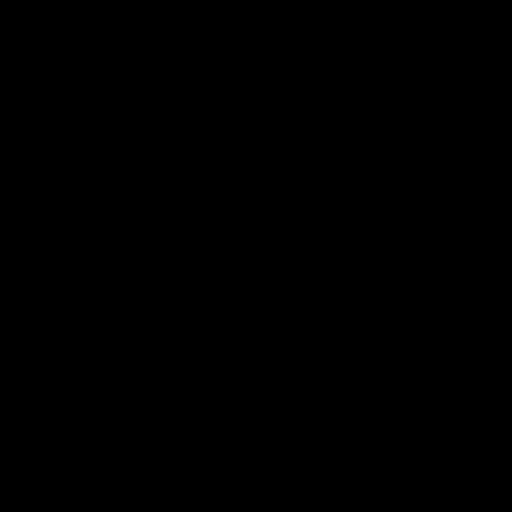

In [4]:
## This is height,width / rows,col
imSize=(512,512)
img_array=(np.ones((imSize[0],imSize[1]))*0).astype(np.uint8)
img_array.shape
Image.fromarray(img_array)

### Calculating additional parameters

#### Visual angle calculator from pixels, pixels/mm, distance_from_screen

In [5]:
pixels=64
approx_pixels_per_mm=10
size_of_element_mm=pixels/approx_pixels_per_mm
distance_from_sreen_mm=900

print('Visual angle in degrees is: ',2*math.degrees(math.atan(size_of_element_mm/(2*distance_from_sreen_mm))))

Visual angle in degrees is:  0.40743493739356734


In [6]:
resolution=[3024,1964]
aspect_ratio=resolution[0]/resolution[1]

size_screen_mm=[304.1,212.4] ## in mm, in inches: 11.97 x 8.36
size_screen_inches=[11.97,8.36]

#### Brightness 

In [7]:
points,centers,grid = generate_path(numElements=12, D=32.0, jitterD=0.25,
                                    B=45, jitterB=0, startRadius=64,imSize=imSize)

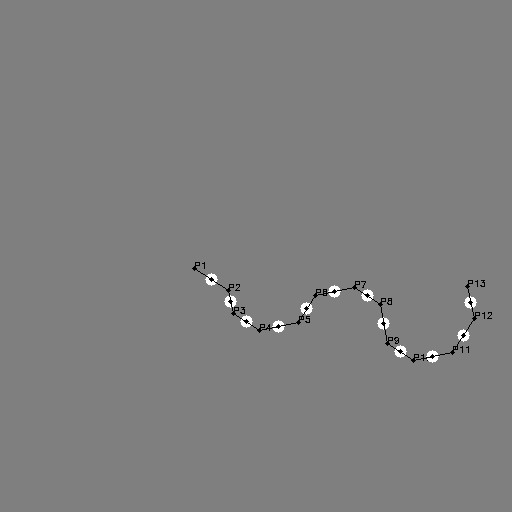

brightness_gray_mean: 		 127.04882431030273
brightness_gray_rms: 		 127.56971134957818
brightness_original_mean_perceived: 		 127.04882431030273
brightness_original_rms_perceived: 		 127.56971134957818
brightness_original_perceived_avg: 		 127.04882431030273


In [8]:
display(show_path(points, centers, imHeight=imSize[0], imWidth=imSize[1]))
get_all_brightness(show_path(points, centers, imHeight=imSize[0], imWidth=imSize[1]))

# 1) Gabors

### Steps:
* 1. Computation (Gabor2d()) 
* 2. Place (Gabor2d())
* 3. Scale/Col (showGabor())
* 4. Viz. (display/imshow)

In [9]:
gabor, gauss, sinusoidal = Gabor2D(lambda_=8, theta=0, phase=-90, stdev=5, imSize=(60,60), elCentre=None, gratingContrast=1.0)

In [10]:
print(gabor.shape)
print(gauss.shape)
print(sinusoidal.shape)

torch.Size([60, 60])
torch.Size([60, 60])
torch.Size([60, 60])


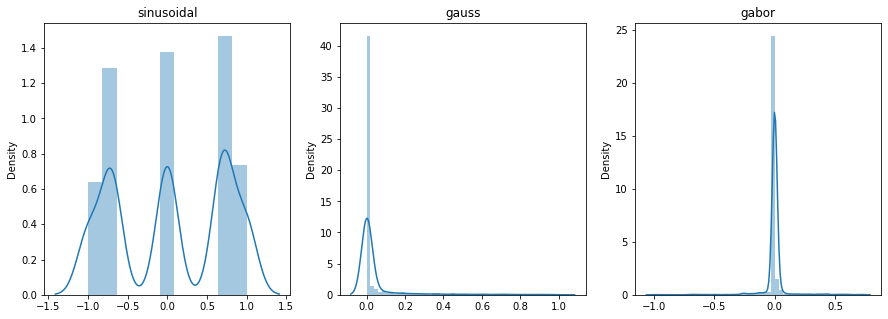

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(sinusoidal)
plt.title('sinusoidal')
# plt.show()

plt.subplot(1,3,2)
sns.distplot(gauss)
plt.title('gauss')
# plt.show()

plt.subplot(1,3,3)
sns.distplot(gabor)
plt.title('gabor')
plt.show()

In [12]:
print(sinusoidal.min(), sinusoidal.max())
print(gauss.min(), gauss.max())
print(gabor.min(), gabor.max())

tensor(-1.) tensor(1.)
tensor(2.3195e-16) tensor(1.)
tensor(-1.) tensor(0.7261)


In [13]:
print(sinusoidal[0,0])
print(gauss[0,0])

print(gabor[0,0])
print(sinusoidal[0,0] * gauss[0,0])

tensor(0.7071)
tensor(2.4566e-15)
tensor(1.7371e-15)
tensor(1.7371e-15)


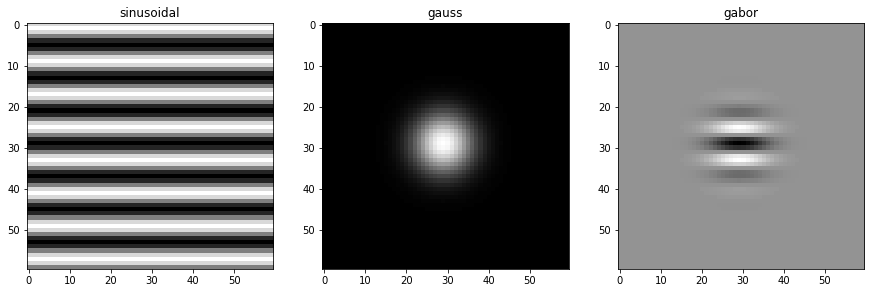

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
imshow(show_gabor(sinusoidal),cmap=plt.gray())
plt.title('sinusoidal')
# plt.show()

plt.subplot(1,3,2)
imshow(show_gabor(gauss),cmap=plt.gray())
plt.title('gauss')
# plt.show()

plt.subplot(1,3,3)
imshow(show_gabor(gabor),cmap=plt.gray())
plt.title('gabor')
plt.show()

#### Scaling function bounds the image

In [15]:
im=imscale(gabor,-1,1)
print(im)
print(im.min(),im.max())

tensor([[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        ...,
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]])
tensor(0.) tensor(0.8631)


In [16]:
im = np.array(im*255).astype(np.uint8)
im

array([[127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127]], dtype=uint8)

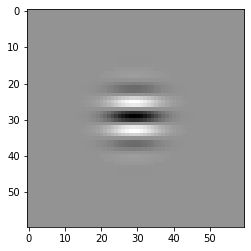

In [17]:
im=Image.fromarray(im)
imshow(im)

### Interactive explorer for Gabors

In [18]:
def demo_gabor(lambda_, theta, phase, stdev, imSize,gratingContrast):
    elCentre=None
    
    gabor, gauss, sinusoidal = Gabor2D(lambda_=lambda_, theta=theta, phase=phase, stdev=stdev, imSize=imSize, elCentre=elCentre, gratingContrast=gratingContrast) 
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    imshow(show_gabor(sinusoidal),cmap=plt.gray())
    plt.title('sinusoidal')
    # plt.show()

    plt.subplot(1,3,2)
    imshow(show_gabor(gauss),cmap=plt.gray())
    plt.title('gauss')
    # plt.show()

    plt.subplot(1,3,3)
    imshow(show_gabor(gabor),cmap=plt.gray())
    plt.title('gabor')
    plt.show()

# interact(demo_gabor,lambda_=(0,16,1), theta=(0,360,30), phase=(-90,90,30), stdev=(1,10,1), imSize=(20,100,20),gratingContrast=(0,1,0.1))
interact(demo_gabor,lambda_=(0,16,1), theta=(0,360,5), phase=(-90,90,30), stdev=(1,10,1), imSize=(20,100,20),gratingContrast=(0,1,0.1))
plt.show()

interactive(children=(IntSlider(value=8, description='lambda_', max=16), IntSlider(value=180, description='the…

### Visualzing gabors with different phases

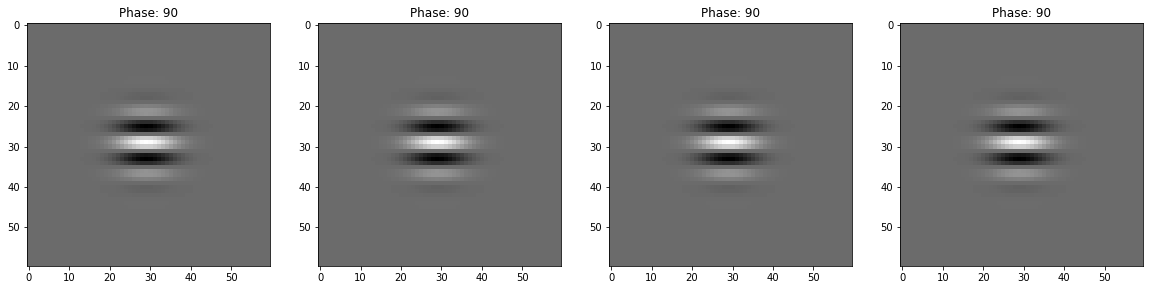

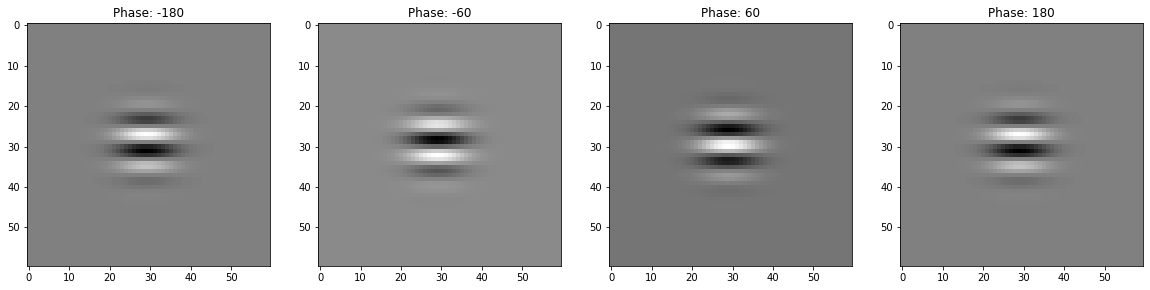

In [19]:
visualize_phase_list=[90,90,90,90]
visualize_gabors=[]
visualize_sinusoidal=[]
for phase in visualize_phase_list:
    gabor, gauss, sinusoidal = Gabor2D(lambda_=8, theta=0, phase=phase, stdev=5, imSize=60, elCentre=None, gratingContrast=1.0)
    visualize_gabors.append(gabor)
    visualize_sinusoidal.append(sinusoidal)


plt.figure(figsize=(20,16))
for i in range(len(visualize_gabors)):
    plt.subplot(1,len(visualize_phase_list),i+1)
    imshow(show_gabor(visualize_gabors[i]),cmap=plt.gray())
    plt.title('Phase: '+ str(visualize_phase_list[i]))

visualize_phase_list=[-180,-60,60,180]


visualize_gabors=[]
visualize_sinusoidal=[]
for phase in visualize_phase_list:
    gabor, gauss, sinusoidal = Gabor2D(lambda_=8, theta=0, phase=phase, stdev=5, imSize=60, elCentre=None, gratingContrast=1.0)
    visualize_gabors.append(gabor)
    visualize_sinusoidal.append(sinusoidal)

plt.figure(figsize=(20,16))
for i in range(len(visualize_gabors)):
    plt.subplot(1,len(visualize_phase_list),i+1)
    imshow(show_gabor(visualize_gabors[i]),cmap=plt.gray())
    plt.title('Phase: '+ str(visualize_phase_list[i]))

# 2) Generate Contour Path

### Steps (Algorithm adapted from Field et al., 1993)

* 1. Computation (generate_path())
* 2. Place (show_path())
* 3. Scale/Col (show_path() calls show_im())
* 4. Viz. (display/imshow)

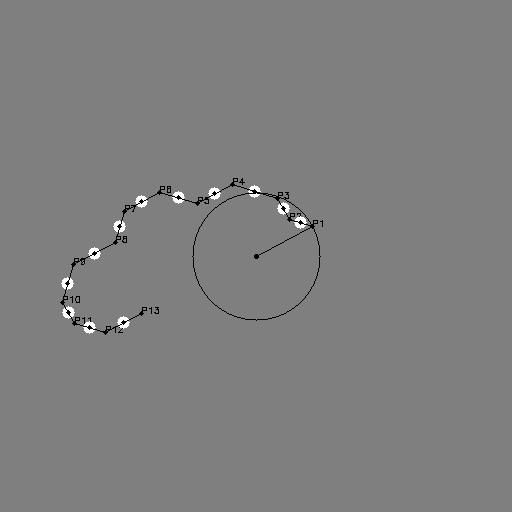

In [20]:
points,centers,grid = generate_path(numElements=12, D=32.0, jitterD=.25, B=45, jitterB=0, startRadius=64,max_attempts=10)
display(show_path_centercircle(points, centers, startRadius=64, imHeight=imSize[0], imWidth=imSize[1]))

### Interactive explorer for Path

In [21]:
def demo_path_builder(numElements, D, jitterD, 
                      B, jitterB, alpha, startRadius,show_grid,show_details):
    
    gridSize=(16,16)
    imSize=(512,512)
    max_attempts=6
    
    points,centers,grid = generate_path(numElements=numElements, gridSize=gridSize, imSize=imSize,D=D, jitterD=jitterD, 
                                        B=B, jitterB=jitterB, startRadius=startRadius, max_attempts=100)
    
    
    if(not show_grid):
        # display(show_path(points, centers, imHeight=imSize[0], imWidth=imSize[1]))
        display(show_path_centercircle(points, centers, startRadius, imHeight=imSize[0], imWidth=imSize[1]))
    else:
        display(show_path_centercircle(points, centers, startRadius, imHeight=imSize[0], imWidth=imSize[1]))
        display(blend_checkerboard(show_path(points, centers, imHeight=512, imWidth=512)))
        display(overlay_grid(points, centers, grid, imHeight=512, imWidth=512))
        
        
        
    if(show_details):
        print(points)
        print(centers)
        print(grid)
        
    
    
    
interact(demo_path_builder,numElements=(5,12,1),D=(16,64,4), jitterD=(0,.50,0.10), 
         B=(0,90,15), jitterB=(0,10,2), alpha=(0,90,45), startRadius=(0,128,32),show_grid=False,show_details=False)
plt.show()

interactive(children=(IntSlider(value=8, description='numElements', max=12, min=5), IntSlider(value=40, descri…

### Testing efficiiency (in terms of speed) for path generation

In [22]:
## Speed to generate 10k paths
# Try running it multiple times to make sure there is no error
# Now if you get errors then just increase the maximum number of attempts 

for i in tqdm(range(10000)):
    points,centers,grid = generate_path(numElements=12, D=32.0, jitterD=.25,
                                    B=45, jitterB=0, startRadius=64,max_attempts=10)

  0%|          | 0/10000 [00:00<?, ?it/s]

### Important

* The points, centers have a coordinate system where the origin is the center of image
* To embed points or draw anything on the image, and the grid has a coordinate system where the top left is the origin

# 3) Generating the entire image

### 3a: Generating stimuli with no backgorund elements and contour elements (oriented systematically)

generate_path_image(randomize=False,background_present=False)

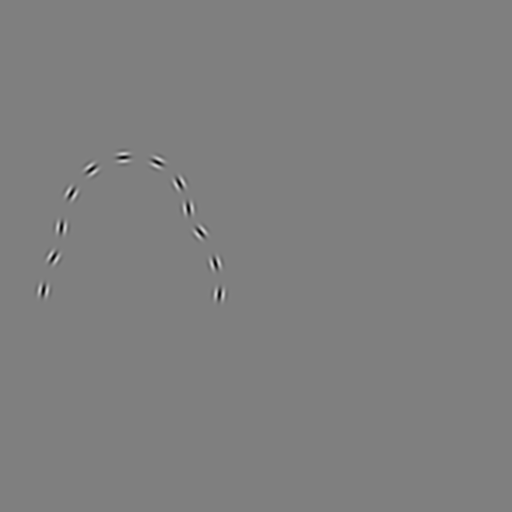

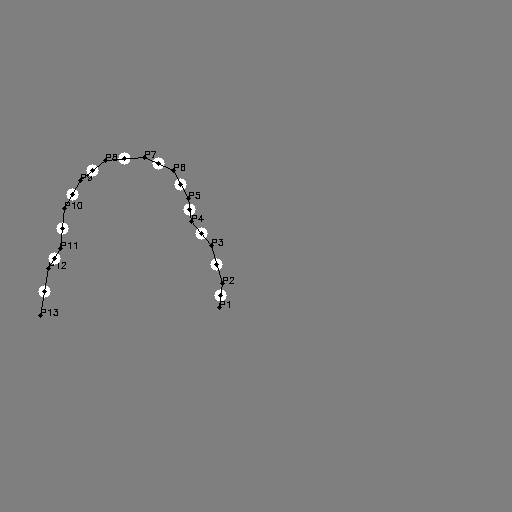

In [23]:
img,points,centers,grid = generate_path_image(randomize=False,background_present=False,alpha_offset=90,startRadius=64)
display(img)
display(show_path(points, centers, imHeight=512, imWidth=512))

### 3b: Generating complete random stimuli
generate_path_image(randomize=True,background_present=True,alpha_offset=90)

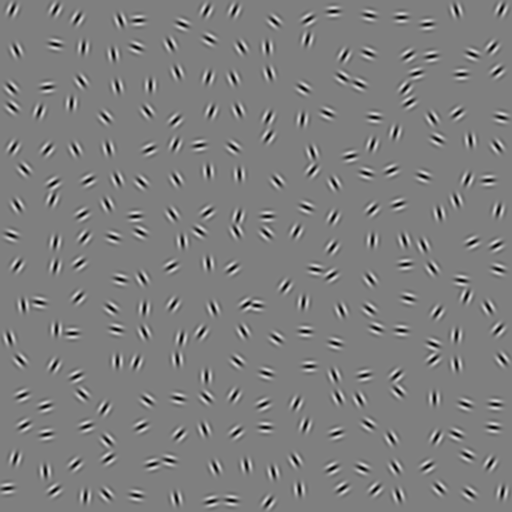

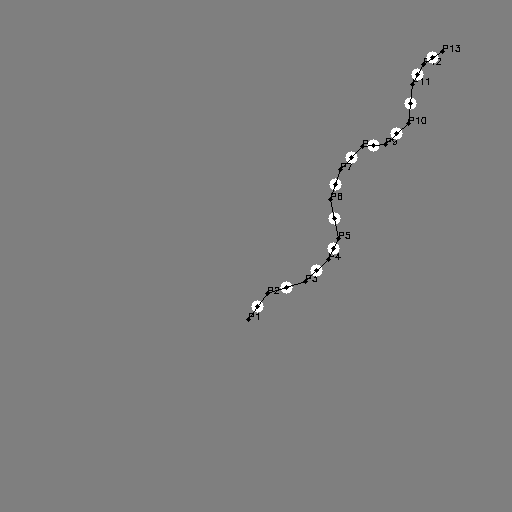

In [24]:
img,points,centers,grid = generate_path_image(randomize=True,background_present=True,alpha_offset=90)
display(img)
display(show_path(points, centers, imHeight=512, imWidth=512))

### 3c: Generating stimuli with all backgorund elements (oriented randomly) and contour elements (oriented systematically) - potential contour-present image

generate_path_image(randomize=False,background_present=True)


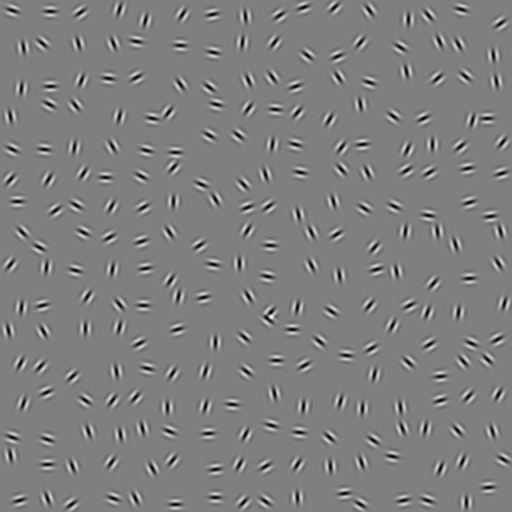

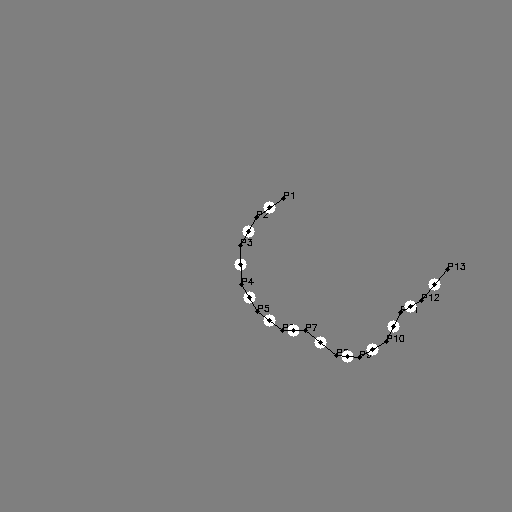

In [25]:
img,points,centers,grid = generate_path_image(randomize=False,background_present=True,alpha_offset=90)
display(img)
display(show_path(points, centers, imHeight=512, imWidth=512))

### 3d: Generating stimuli with all backgorund elements (oriented randomly) and contour elements (oriented randomly) - potential contour-absent image
generate_path_image(randomize=True,background_present=True)

This is the tightly controlled image (because compared to contour-present image, only colienarity between contour elements is broken). This call will generate a image by randomizing elements on the contour path. This is a tightly controlled "contour-bsent image" method, because any information arising from the location of the elements is preserved.

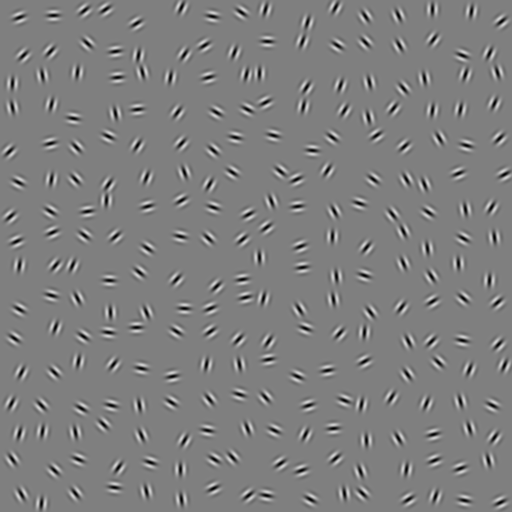

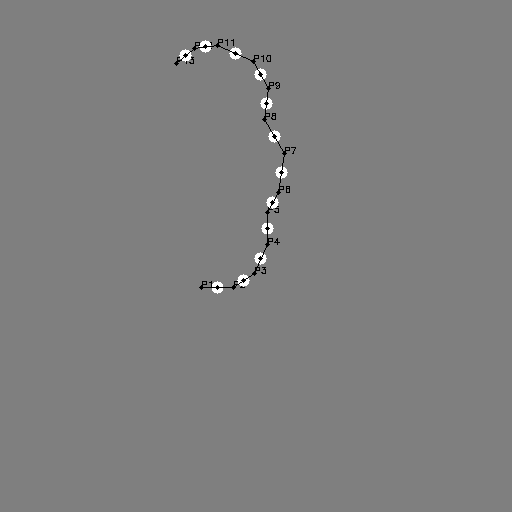

In [26]:
img,points,centers,grid = generate_path_image(randomize=True,background_present=True,alpha_offset=90)
display(img)
display(show_path(points, centers, imHeight=512, imWidth=512))

### Interactive explorer for the full image

In [27]:
def demo_path(
    numElements,D, jitterD,
    B, jitterB, startRadius,show_grid,
    randomize,background_present,alpha_offset):
    
    gridSize=(16,16)
    imSize=512
    
    
    
    img,points,centers,grid = generate_path_image(numElements=numElements, gridSize=gridSize, imWidth=imSize,imHeight=imSize,D=D, jitterD=jitterD, 
                                                  B=B, jitterB=jitterB, startRadius=startRadius,
                                                  randomize=randomize,background_present=background_present,alpha_offset=alpha_offset)
    
    display(img)
    display(blend(show_path_centercircle(points, centers, startRadius, imHeight=imSize, imWidth=imSize),img))

    
    if(not show_grid):
        display(show_path(points, centers, imHeight=imSize, imWidth=imSize))
    else:
        # display(blend_checkerboard(show_path(points, centers, imHeight=512, imWidth=512)))
        display(blend(show_path_centercircle(points, centers, startRadius, imHeight=imSize, imWidth=imSize),blend_checkerboard(show_path(points, centers, imHeight=512, imWidth=512))))
        display(blend_checkerboard(blend(show_path_centercircle(points, centers, startRadius, imHeight=imSize, imWidth=imSize),img)))
        display(overlay_grid(points, centers, grid, imSize, imSize))

        
interact(demo_path,
         numElements=(5,12,1),D=(32,64,16), jitterD=(0,.50,0.10), 
         B=(0,90,5), jitterB=(0,10,2), alpha=(0,90,45), startRadius=(0,128,32),show_grid=False,
         randomize=False,background_present=False,alpha_offset=(0,90,45))

plt.show()

interactive(children=(IntSlider(value=8, description='numElements', max=12, min=5), IntSlider(value=48, descri…

# 4) Pair of Contour-Present and Contour-Absent Image

## Example 1

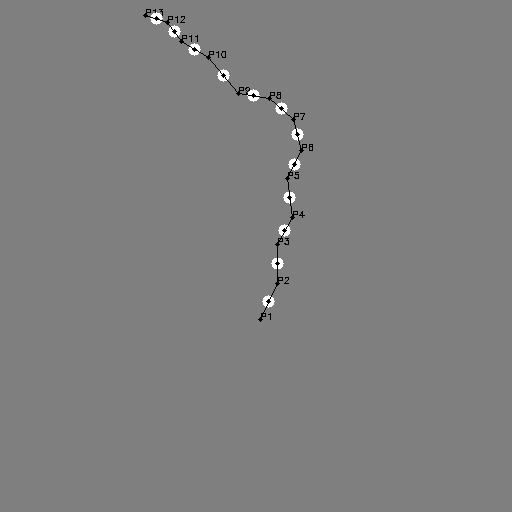

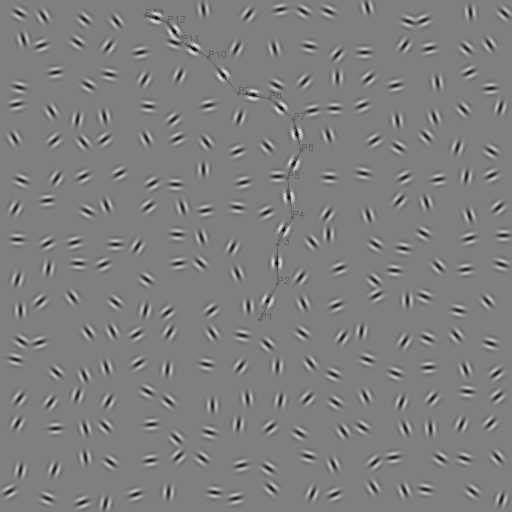

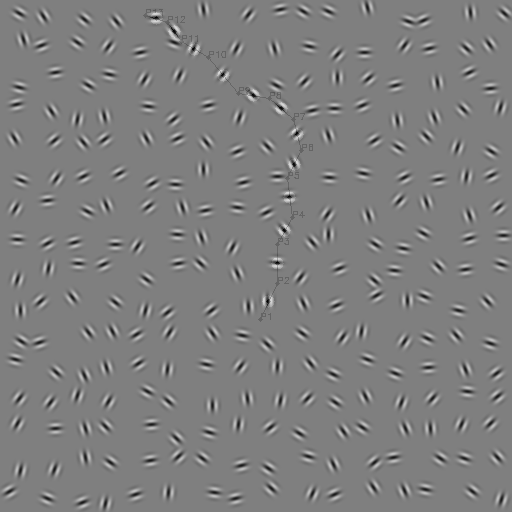

In [28]:
img_contour,img_control,points,centers,grid = generate_contour_control_pair_image(background_present=True,alpha_offset=90)

## just to see the path
display(show_path(points, centers, imHeight=512, imWidth=512))

# display(img_contour)
# display(img_control)


## to see the whole image - BLENDING just to DEBUG

## image with contour
display(blend(show_path(points, centers, imHeight=512, imWidth=512),img_contour))
## control image
display(blend(show_path(points, centers, imHeight=512, imWidth=512),img_control))

## Example 2

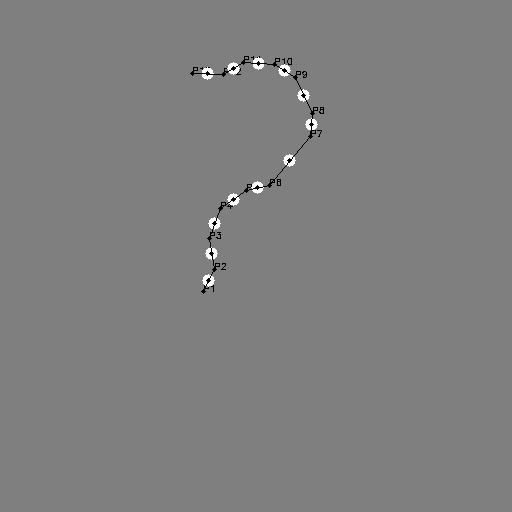

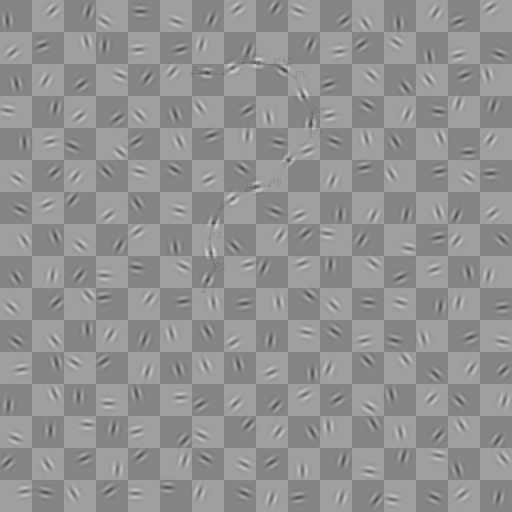

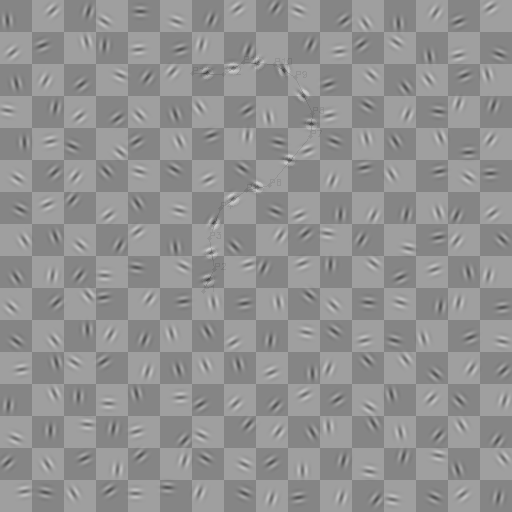

In [29]:
img_contour,img_control,points,centers,grid = generate_contour_control_pair_image(background_present=True,alpha_offset=90)

## just to see the path
display(show_path(points, centers, imHeight=512, imWidth=512))

# display(img_contour)
# display(img_control)


## to see the whole image - BLENDING just to DEBUG

## image with contour
display(blend_checkerboard(blend(show_path(points, centers, imHeight=512, imWidth=512),img_contour)))
## control image
display(blend_checkerboard(blend(show_path(points, centers, imHeight=512, imWidth=512),img_control)))

# 5) Generate Everything - contour-present and contour-absent (with and without background)

In [30]:
# # Generating the entire path image
# def generate_gray_display(imWidth=512,imHeight=512):
#     image = np.zeros((imWidth,imHeight))            
#     image = np.clip(image, -1,1)
    
#     # img = Image.fromarray((image*127.5+127.5).astype(np.uint8))
    
#     img=Image.fromarray(np.array(image*255).astype(np.uint8))
#     return img

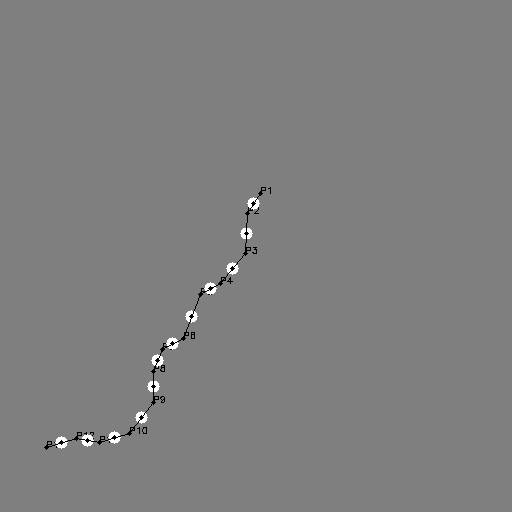

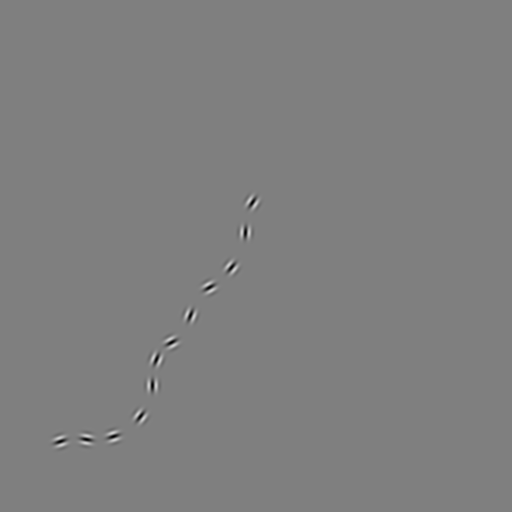

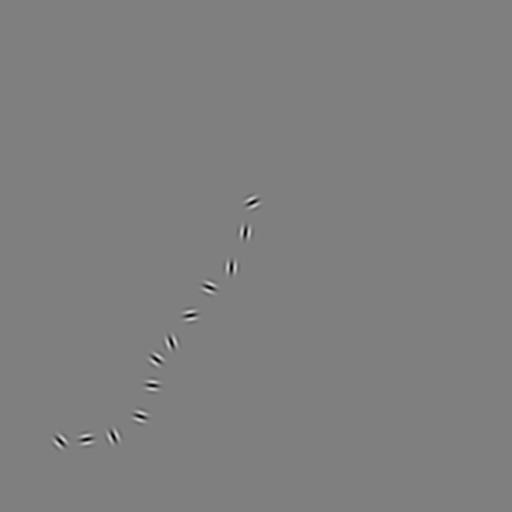

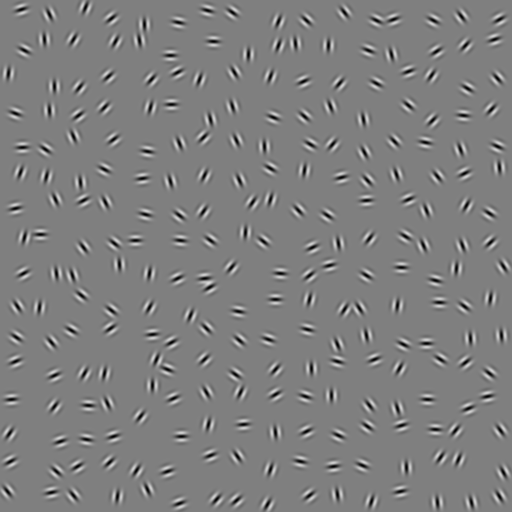

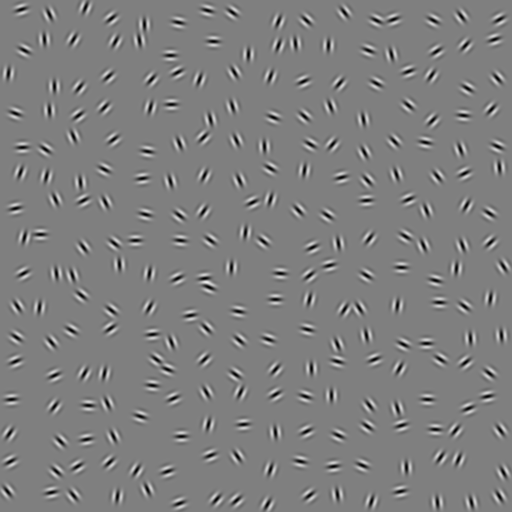

In [31]:
img_contour,img_control,img_contour_background,img_control_background,points,centers,grid,image_recorder_dict= generate_everything(alpha_offset=90-0,B=30)

## path
display(show_path(points, centers, imHeight=512, imWidth=512))

## contour-stimuli
display(img_contour)
display(img_control)
display(img_contour_background)
display(img_control_background)

In [32]:
# # BLENDING just to DEBUG
# ## contour without background
# display(blend(show_path(points, centers, imHeight=512, imWidth=512),img_contour,0.8))

# ## control without background
# display(blend(show_path(points, centers, imHeight=512, imWidth=512),img_control,0.8))

# ## contour with background
# display(blend(show_path(points, centers, imHeight=512, imWidth=512),img_contour_background,0.7))

# ## control with background
# display(blend(show_path(points, centers, imHeight=512, imWidth=512),img_control_background,0.7))

### If you do not want text in the path image -> comment this later

In [33]:
# def show_path(points, centers, imHeight=512, imWidth=512):
#     '''
    
#     '''
#     img = np.zeros((imHeight,imWidth,3))
#     for i,(pointX,pointY,_) in enumerate(points):
#         x,y = int(imWidth/2+pointX), int(imHeight/2+pointY)
#         img = cv2.circle(img, (x,y), radius=2, color=(-1, -1, -1), thickness=-1)
#         # cv2.putText(img,'P'+str(i+1),(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.3,(-1,-1,-1),1)
        
#     for pointX,pointY,_ in centers:
#         x,y = int(imWidth/2+pointX), int(imHeight/2+pointY)
#         img = cv2.circle(img, (x,y), radius=6, color=(1, 1, 1), thickness=-1)
#         img = cv2.circle(img, (x,y), radius=2, color=(-1, -1, -1), thickness=-1)
        
        
#     point_positions=(np.array(points)[:,:2] + [imWidth/2,imHeight/2]).astype(int)
#     cv2.polylines(img, 
#               [point_positions],isClosed = False,
#               color = (-1,-1,-1),
#               thickness = 1)
    
#     return show_im(img)



# def show_path_centercircle(points, centers, startRadius, imHeight=512, imWidth=512):
#     img = np.zeros((imHeight,imWidth,3))
#     for i,(pointX,pointY,_) in enumerate(points):
#         x,y = int(imWidth/2+pointX), int(imHeight/2+pointY)
#         img = cv2.circle(img, (x,y), radius=2, color=(-1, -1, -1), thickness=-1)
#         # cv2.putText(img,'P'+str(i+1),(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.3,(-1,-1,-1),1)
        
#     for pointX,pointY,_ in centers:
#         x,y = int(imWidth/2+pointX), int(imHeight/2+pointY)
#         img = cv2.circle(img, (x,y), radius=6, color=(1, 1, 1), thickness=-1)
#         img = cv2.circle(img, (x,y), radius=2, color=(-1, -1, -1), thickness=-1)
        
        
#     point_positions=(np.array(points)[:,:2] + [imWidth/2,imHeight/2]).astype(int)
#     cv2.polylines(img, 
#               [point_positions],isClosed = False,
#               color = (-1,-1,-1),
#               thickness = 1)
    
    
#     # Center Circle
#     img = cv2.circle(img, (int(imWidth/2),int(imHeight/2)), radius=startRadius, color=(-1, -1, -1), thickness=1)
#     img = cv2.circle(img, (int(imWidth/2),int(imHeight/2)), radius=1, color=(-1, -1, -1), thickness=2)
#     # Connecting the center to the first point
#     cv2.polylines(img, 
#               [np.array([[int(imWidth/2),int(imHeight/2)],point_positions[0]])],isClosed = False,
#               color = (-1,-1,-1),
#               thickness = 1)
    
#     return show_im(img)





# ################################################################################################################
# # Generating the image quadruplet -> contour,control, contour-background, control-background
# def generate_everything(imWidth=512,imHeight=512,numElements=12, D=32.0,
#                         jitterD=.25,B=30, jitterB=10, startRadius=64,
#                         alpha_offset=90,gridSize=(16,16),max_attempts=100,
#                         gabor_lambda=8,gabor_phase=-90,gabor_stddev=4.0,gabor_imSize=28,gabor_elCentre=None,gabor_gratingContrast=1.0):
    
#     points,centers,grid = generate_path(numElements=numElements, D=D, jitterD=jitterD,
#                                         B=B, jitterB=jitterB,
#                                         startRadius=startRadius,gridSize=gridSize,imSize=(imWidth,imHeight),max_attempts=max_attempts)
    
#     image_contour = np.zeros((imWidth,imHeight))
#     image_control = np.zeros((imWidth,imHeight))
    
#     image_contour_background=np.zeros((imWidth,imHeight))
#     image_control_background=np.zeros((imWidth,imHeight))
    
    
#     image_contour_justbg = np.zeros((imWidth,imHeight))
#     image_control_justbg = np.zeros((imWidth,imHeight))
    
#     ########################################################
#     # IMAGE RECORDER - SUPER IMPORTANT TO RENDER THE IMAGE AGAIN
#     # This might be updated later based on the information we want
#     image_recorder_dict={
        
#         # Basic image parameters
#         'image_width':imWidth,'image_height':imHeight,
        
#         # Grid and path parameters
#         'path_B':B,'path_D':D,'path_A':90-alpha_offset,'path_numElement':numElements,
#         'path_jitterB':jitterB,'path_jitterD':jitterD,
#         'path_startRadius':startRadius,
#         'path_offset':alpha_offset,
#         'grid':grid,
#         'path_points':np.array(points),
#         'path_centers':np.array(centers),
        
#         # Most important parameters - position, and alpha values
#         'element_position':[],
#         'element_theta_contour':[],'element_theta_control':[],
        
#         # Gabor parameters
#         'gabor_lambda':gabor_lambda,'gabor_phase':gabor_phase,'gabor_stdev':gabor_stddev,
#         'gabor_imSize':gabor_imSize,'gabor_elCentre':gabor_elCentre,'gabor_gratingContrast':gabor_gratingContrast}
#     ########################################################
    
    
#     gridRows,gridCols = grid.shape
    
#     c = 0
#     for row in range(gridRows):
#         for col in range(gridCols):
#             if grid[row,col]:
#                 # cell is part of the contour path
#                 startX,startY,theta = centers[c]
#                 startX = int(imWidth/2+startX)
#                 startY = int(imHeight/2+startY)
                
                
#                 alpha_contour = theta - alpha_offset # TODO, make sure our Gabor draws 0 as vertical...theta here is actually the alpha
#                 alpha_control = np.random.rand() * 180 - 90
                
                
                
#                 element_contour,_,_ = Gabor2D(lambda_=image_recorder_dict['gabor_lambda'], theta=alpha_contour, phase=image_recorder_dict['gabor_phase'], 
#                                               stdev=image_recorder_dict['gabor_stdev'], imSize=image_recorder_dict['gabor_imSize'], elCentre=image_recorder_dict['gabor_elCentre'], 
#                                               gratingContrast=image_recorder_dict['gabor_gratingContrast'])
                
#                 element_control,_,_ = Gabor2D(lambda_=image_recorder_dict['gabor_lambda'], theta=alpha_control, phase=image_recorder_dict['gabor_phase'], 
#                                               stdev=image_recorder_dict['gabor_stdev'], imSize=image_recorder_dict['gabor_imSize'], elCentre=image_recorder_dict['gabor_elCentre'], 
#                                               gratingContrast=image_recorder_dict['gabor_gratingContrast'])
                
                
#                 startX -= (image_recorder_dict['gabor_imSize']//2)
#                 startY -= (image_recorder_dict['gabor_imSize']//2)
#                 #element[:,:] = -1
#                 c+=1
                
#                 try:
                    
#                     image_contour = embed(element_contour.numpy(), image_contour, startX, startY)
#                     image_control = embed(element_control.numpy(), image_control, startX, startY)
                    
#                     image_contour_background = embed(element_contour.numpy(), image_contour_background, startX, startY)
#                     image_control_background = embed(element_control.numpy(), image_control_background, startX, startY)
                    
#                     ########################################################
#                     # Add in IMAGE RECORDER
#                     image_recorder_dict['element_position'].append([startX,startY])
#                     image_recorder_dict['element_theta_contour'].append(alpha_contour)
#                     image_recorder_dict['element_theta_control'].append(alpha_control)
#                     ########################################################
                    
                    
#                 except:
#                     print("oops", startX, startY)
#                     pass
                
                
#             else:
#                 # cell is a background element and not part of the path
   
#                 alpha = np.random.rand() * 180 - 90
    
    
    
#                 element,_,_ = Gabor2D(lambda_=image_recorder_dict['gabor_lambda'], theta=alpha, phase=image_recorder_dict['gabor_phase'], 
#                                       stdev=image_recorder_dict['gabor_stdev'], imSize=image_recorder_dict['gabor_imSize'], elCentre=image_recorder_dict['gabor_elCentre'], 
#                                       gratingContrast=image_recorder_dict['gabor_gratingContrast'])
        
#                 startY = row*32 + 32//2 - (image_recorder_dict['gabor_imSize']//2) - np.random.randint(-(image_recorder_dict['gabor_imSize']//3),(image_recorder_dict['gabor_imSize']//3))
#                 startX = col*32 + 32//2 - (image_recorder_dict['gabor_imSize']//2) - np.random.randint(-(image_recorder_dict['gabor_imSize']//3),(image_recorder_dict['gabor_imSize']//3))

#                 #startY = row*32 + 32//2 - 28//2 - np.random.randint(-1, 1)
#                 #startX = col*32 + 32//2 - 28//2 - np.random.randint(-1, 1)

#                 #element[:,:] *= .35

#                 try:
#                     image_contour_background = embed(element.numpy(), image_contour_background, startX, startY)
#                     image_control_background = embed(element.numpy(), image_control_background, startX, startY)
                    
                    
                    
#                     image_contour_justbg = embed(element.numpy(), image_contour_justbg, startX, startY)
#                     image_control_justbg = embed(element.numpy(), image_control_justbg, startX, startY)
                    
#                     ########################################################
#                     # Add in IMAGE RECORDER
#                     image_recorder_dict['element_position'].append([startX,startY])
#                     image_recorder_dict['element_theta_contour'].append(alpha)
#                     image_recorder_dict['element_theta_control'].append(alpha)
#                     ########################################################

#                 except:
#                     print("oops", startX, startY)
#                     pass
                    
                    
                    
#     image_contour = np.clip(image_contour, -1,1)
#     img_contour = Image.fromarray((image_contour*127.5+127.5).astype(np.uint8))
    
#     image_control = np.clip(image_control, -1,1)
#     img_control = Image.fromarray((image_control*127.5+127.5).astype(np.uint8))
    
#     image_contour_background = np.clip(image_contour_background, -1,1)
#     img_contour_background = Image.fromarray((image_contour_background*127.5+127.5).astype(np.uint8))
    
#     image_control_background = np.clip(image_control_background, -1,1)
#     img_control_background = Image.fromarray((image_control_background*127.5+127.5).astype(np.uint8))
    
    
    
#     image_contour_justbg = np.clip(image_contour_justbg, -1,1)
#     image_contour_justbg = Image.fromarray((image_contour_justbg*127.5+127.5).astype(np.uint8))
    
#     image_control_justbg = np.clip(image_control_justbg, -1,1)
#     image_control_justbg = Image.fromarray((image_control_justbg*127.5+127.5).astype(np.uint8))
    
    
    
    
    
    
#     ########################################################
#     # Update the IMAGE RECORDER for consistent shapes - element gabor positions, gabor alpha values for contour, and gabor alpha values for control reshaped in the format/shape of the grid
#     image_recorder_dict['element_position']=np.reshape(np.array(image_recorder_dict['element_position']),(image_recorder_dict['grid'].shape[0],image_recorder_dict['grid'].shape[1],-1))
#     image_recorder_dict['element_theta_contour']=np.reshape(np.array(image_recorder_dict['element_theta_contour']),(image_recorder_dict['grid'].shape[0],image_recorder_dict['grid'].shape[1],-1))
#     image_recorder_dict['element_theta_control']=np.reshape(np.array(image_recorder_dict['element_theta_control']),(image_recorder_dict['grid'].shape[0],image_recorder_dict['grid'].shape[1],-1))
#     ########################################################
    
    
#     return img_contour,img_control,img_contour_background,img_control_background,image_contour_justbg,image_control_justbg,points,centers,grid,image_recorder_dict
# ################################################################################################################

# def demo_path(
#     numElements=12,D=32.0, jitterD=0.25,
#     B=30, jitterB=10, startRadius=64,show_grid=False,
#     randomize=False,background_present=False,alpha_offset=90):
    
#     gridSize=(16,16)
#     imSize=512
    

    
#     img_contour,img_control,img_contour_background,img_control_background,image_contour_justbg,image_control_justbg,points,centers,grid,image_recorder_dict= generate_everything(alpha_offset=90-0,B=30)
    
    
#     ## Display the path
#     display(blend(show_path_centercircle(points, centers, startRadius, imHeight=imSize, imWidth=imSize),blend_checkerboard(show_path(points, centers, imHeight=512, imWidth=512))))
    
#     ## Display the fg
#     display(blend_checkerboard(img_contour))
    
#     display(blend_checkerboard(img_control))

#     ## Display the bg
#     display(blend_checkerboard(image_contour_justbg))
#     display(blend_checkerboard(image_control_justbg))

#     ## Display the cotour_stimuli
#     display(img_contour_background)
#     display(img_control_background)
    
    
    
    
#     blend(show_path_centercircle(points, centers, startRadius, imHeight=imSize, imWidth=imSize),blend_checkerboard(show_path(points, centers, imHeight=512, imWidth=512))).save('./manuscript_figures/demo_supplementary/path.png' ,dpi=(300,300))
#     blend_checkerboard(img_contour).save('./manuscript_figures/demo_supplementary/fg_contour-present.png' ,dpi=(300,300))
#     blend_checkerboard(img_control).save('./manuscript_figures/demo_supplementary/fg_contour-absent.png' ,dpi=(300,300))
#     blend_checkerboard(image_contour_justbg).save('./manuscript_figures/demo_supplementary/bg_contour-present.png' ,dpi=(300,300))
#     blend_checkerboard(image_control_justbg).save('./manuscript_figures/demo_supplementary/bg_contour-absent.png' ,dpi=(300,300))
#     img_contour_background.save('./manuscript_figures/demo_supplementary/contour-present.png' ,dpi=(300,300))
#     img_control_background.save('./manuscript_figures/demo_supplementary/contour-absent.png' ,dpi=(300,300))
    
    
    
    
        
# interact(demo_path,
#          numElements=(5,12,1),D=(32,64,16), jitterD=(0,.50,0.10), 
#          B=(0,90,5), jitterB=(0,10,2), alpha=(0,90,45), startRadius=(0,128,32),show_grid=False,
#          randomize=False,background_present=False,alpha_offset=(0,90,45))



# 6) Rendering images using the parameters 

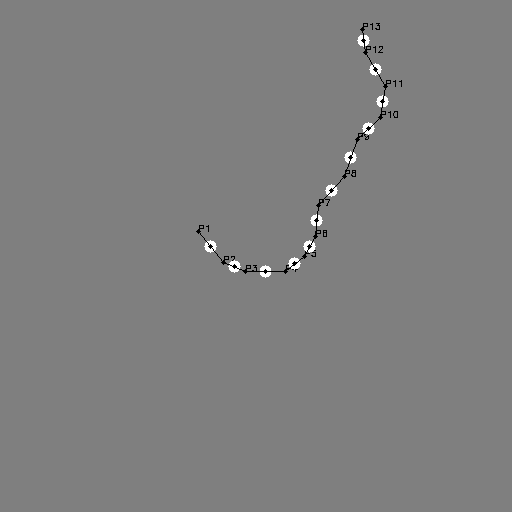

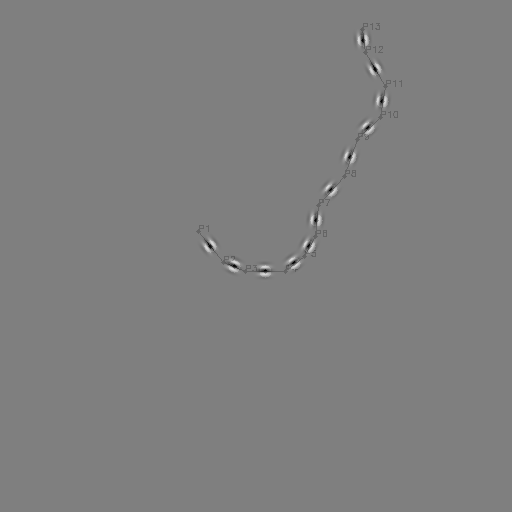

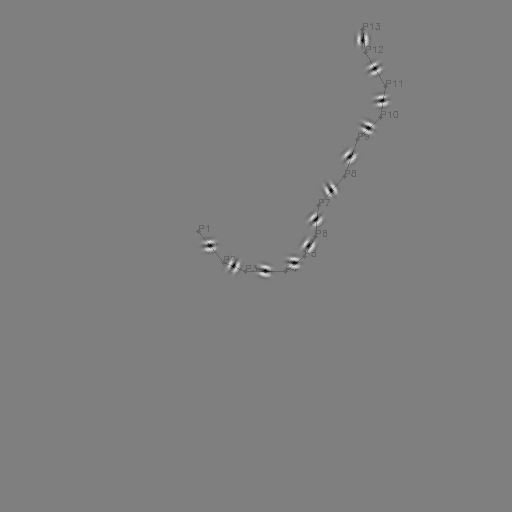

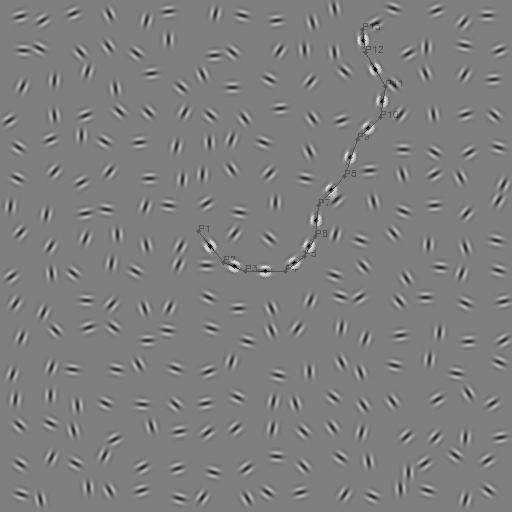

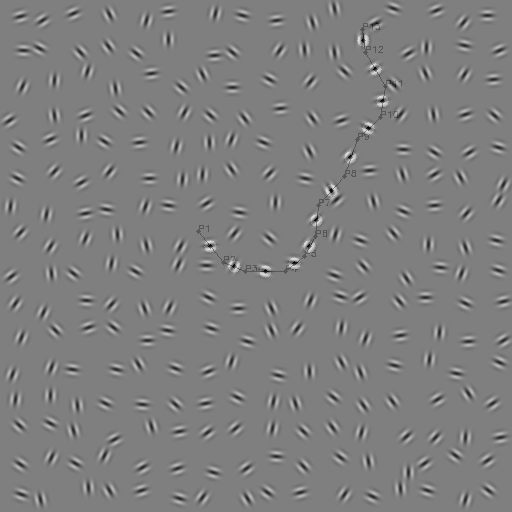

In [34]:
## Generate the image and visualize first
img_contour,img_control,img_contour_background,img_control_background,points,centers,grid,image_recorder_dict= generate_everything(alpha_offset=90-0,B=30)







## path
display(show_path(points, centers, imHeight=512, imWidth=512))

# ## contour-stimuli
# ## contour without background
display(blend(show_path(points, centers, imHeight=512, imWidth=512),img_contour,0.8))

## control without background
display(blend(show_path(points, centers, imHeight=512, imWidth=512),img_control,0.8))

## contour with background
display(blend(show_path(points, centers, imHeight=512, imWidth=512),img_contour_background,0.7))

## control with background
display(blend(show_path(points, centers, imHeight=512, imWidth=512),img_control_background,0.7))

### Render using the image_recorder_dict

In [35]:
print(image_recorder_dict.keys())

print(image_recorder_dict['grid'].shape)
print(image_recorder_dict['element_position'].shape)
print(image_recorder_dict['element_theta_contour'].shape)
print(image_recorder_dict['element_theta_control'].shape)

# For the background element
print(np.all(image_recorder_dict['element_theta_contour'][np.where(image_recorder_dict['grid']==0)] == image_recorder_dict['element_theta_control'][np.where(image_recorder_dict['grid']==0)]))

# For the path element
print(np.all(image_recorder_dict['element_theta_contour'][np.where(image_recorder_dict['grid']==1)] == image_recorder_dict['element_theta_control'][np.where(image_recorder_dict['grid']==1)]))

dict_keys(['image_width', 'image_height', 'path_B', 'path_D', 'path_A', 'path_numElement', 'path_jitterB', 'path_jitterD', 'path_startRadius', 'path_offset', 'grid', 'path_points', 'path_centers', 'element_position', 'element_theta_contour', 'element_theta_control', 'gabor_lambda', 'gabor_phase', 'gabor_stdev', 'gabor_imSize', 'gabor_elCentre', 'gabor_gratingContrast'])
(16, 16)
(16, 16, 2)
(16, 16, 1)
(16, 16, 1)
True
False


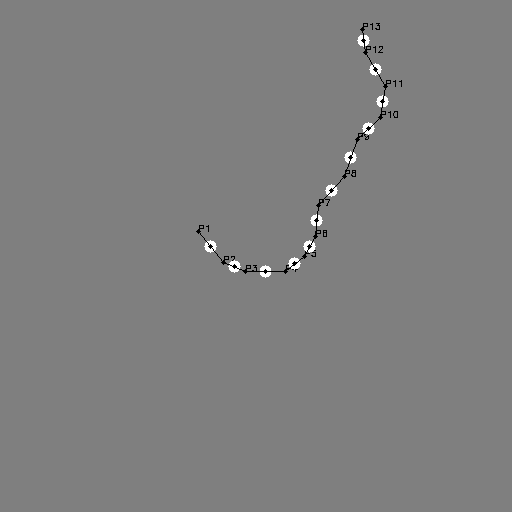

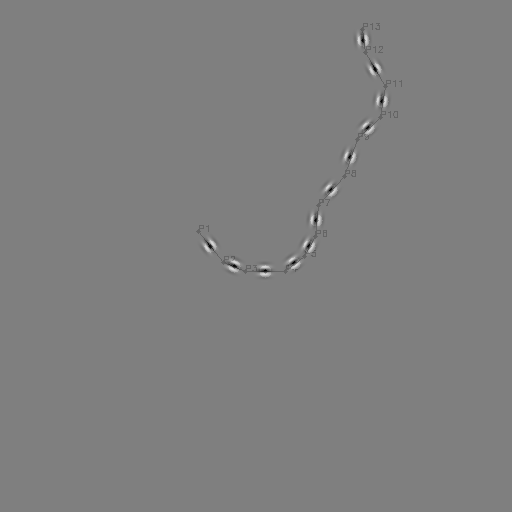

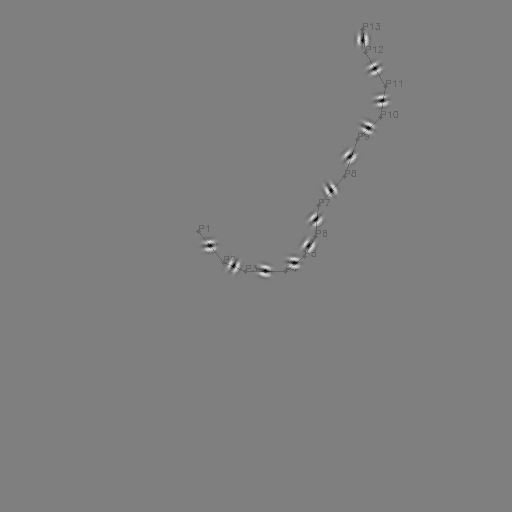

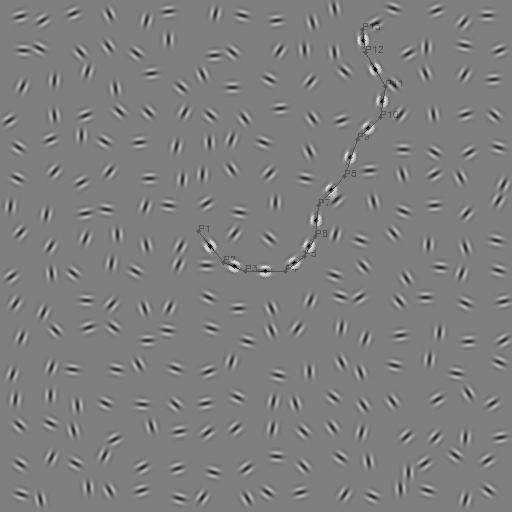

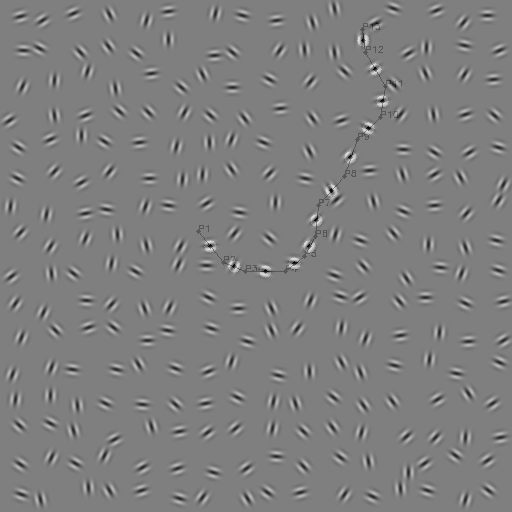

In [36]:
img_contour, img_control, img_contour_background, img_control_background=image_renderer(image_recorder_dict)


display(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']))
display(blend(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']),img_contour,0.8))
display(blend(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']),img_control,0.8))
display(blend(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']),img_contour_background,0.7))
display(blend(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']),img_control_background,0.7))

# 7) Generate Masks

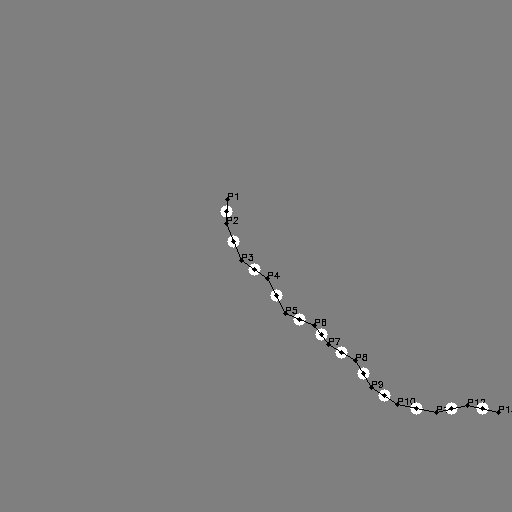

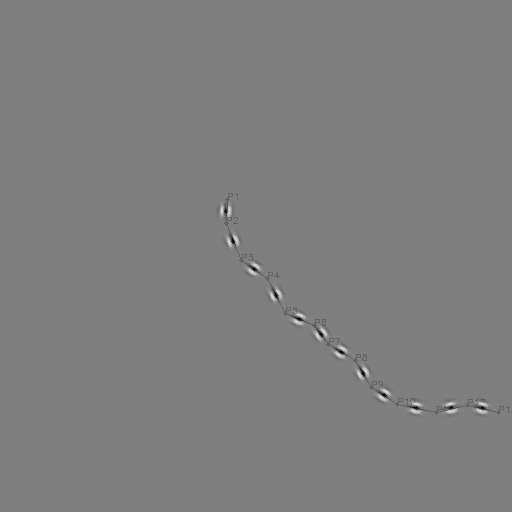

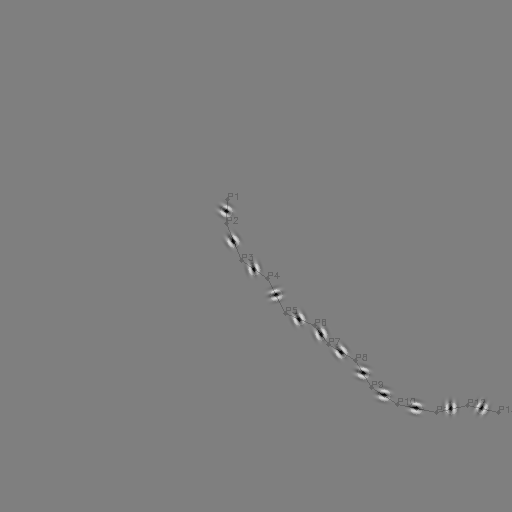

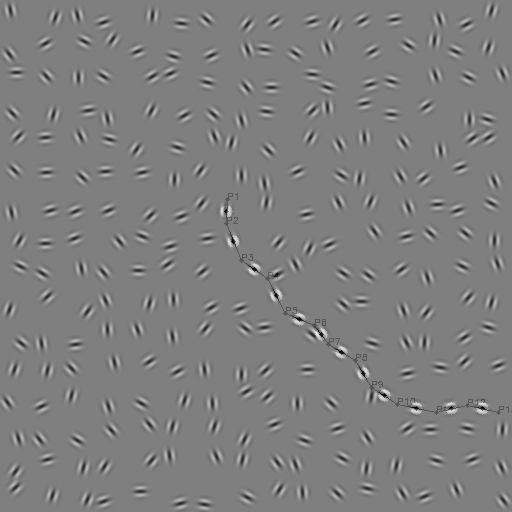

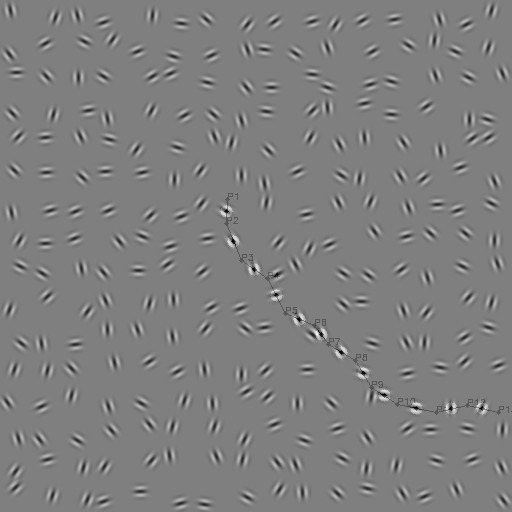

In [37]:
## Generate the image and visualize first
img_contour,img_control,img_contour_background,img_control_background,points,centers,grid,image_recorder_dict= generate_everything(alpha_offset=90-0,B=30)







## path
display(show_path(points, centers, imHeight=512, imWidth=512))

# ## contour-stimuli
# ## contour without background
display(blend(show_path(points, centers, imHeight=512, imWidth=512),img_contour,0.8))

## control without background
display(blend(show_path(points, centers, imHeight=512, imWidth=512),img_control,0.8))

## contour with background
display(blend(show_path(points, centers, imHeight=512, imWidth=512),img_contour_background,0.7))

## control with background
display(blend(show_path(points, centers, imHeight=512, imWidth=512),img_control_background,0.7))

### These functions can generate the gaussian and binary masks for the contour and background locations

In [38]:
img_path_fg, img_path_bg, list_gauss=image_renderer_gaussian(image_recorder_dict)
mask_img_path_fg, mask_img_path_bg, list_gauss=mask_renderer(image_recorder_dict,140)

In [39]:
print(np.min(img_path_fg), np.max(img_path_fg))
print(np.min(img_path_bg), np.max(img_path_bg))

127 255
127 255


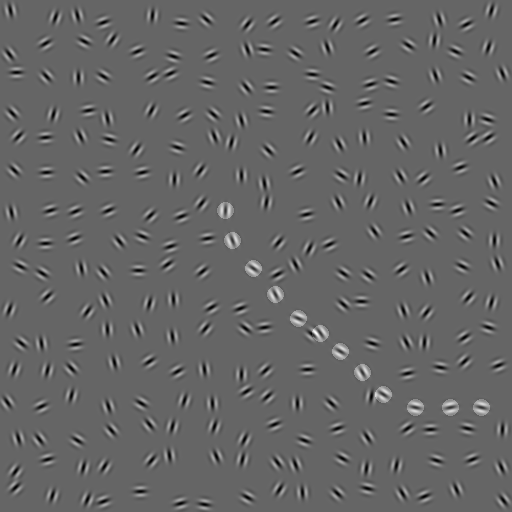

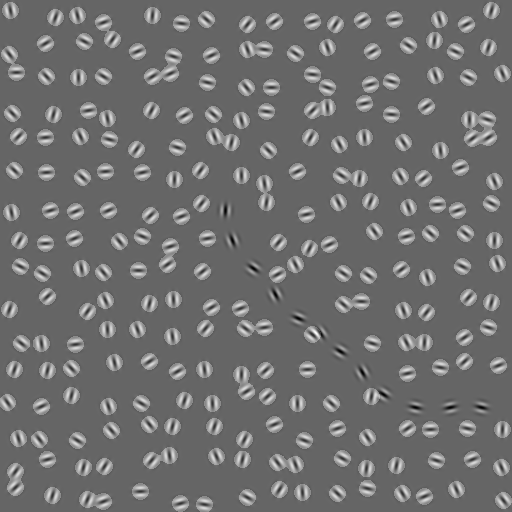

In [40]:
display(blend(mask_img_path_fg,img_contour_background,0.8))
display(blend(mask_img_path_bg,img_contour_background,0.8))

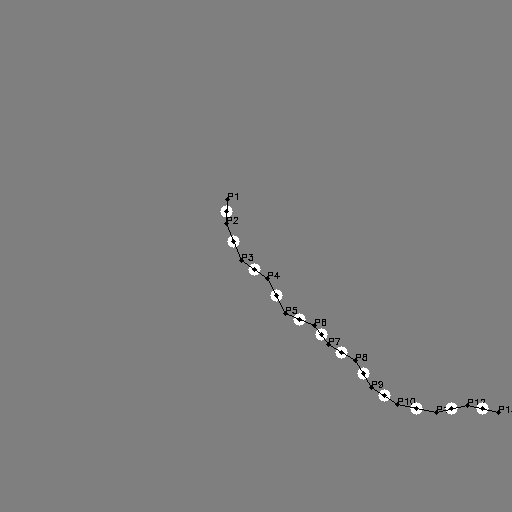

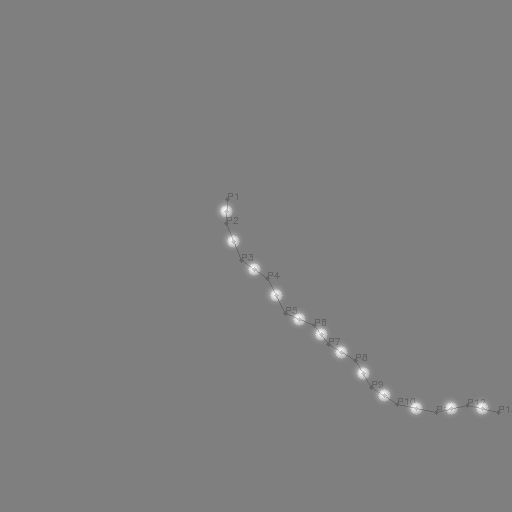

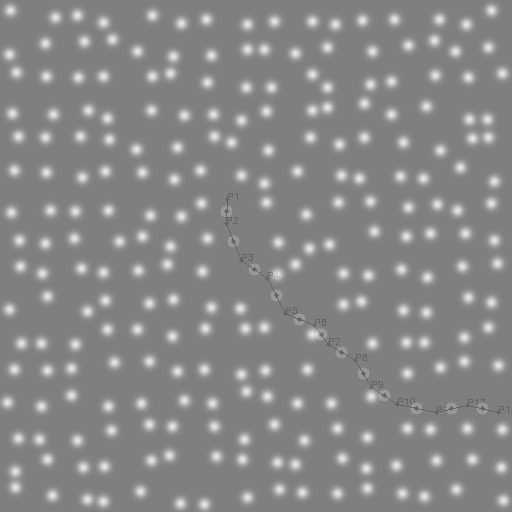

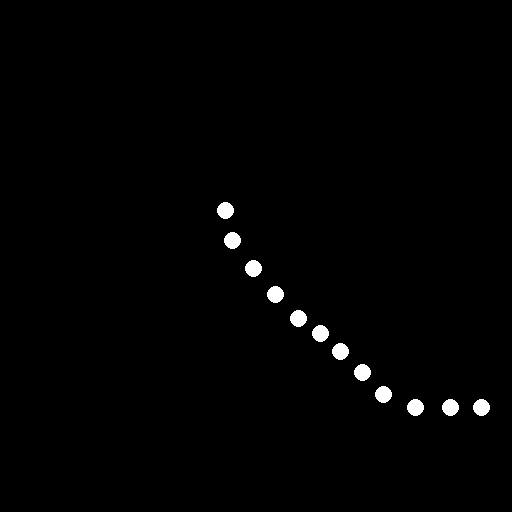

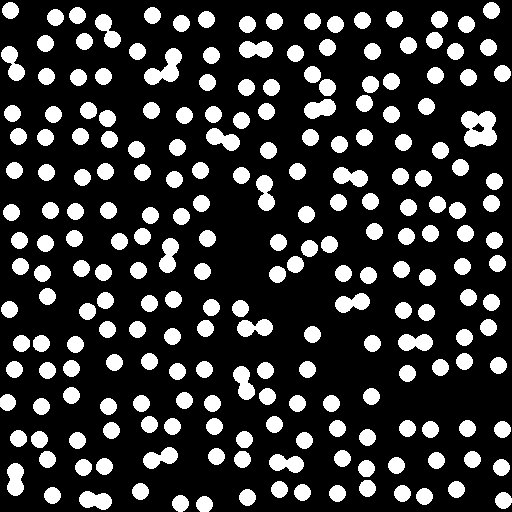

In [41]:
display(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']))
display(blend(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']),img_path_fg,0.8))
display(blend(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']),img_path_bg,0.8))

display(mask_img_path_fg)
display(mask_img_path_bg)

# 8) Making Demo Images

In [42]:
if(not os.path.exists('./manuscript_figures/demo_big_small')):
    os.makedirs('./manuscript_figures/demo_big_small')
    
if(not os.path.exists('./manuscript_figures/demo_big_small')):
    os.makedirs('./manuscript_figures/demo_big_small')
    
if(not os.path.exists('./manuscript_figures/demo_big_small')):
    os.makedirs('./manuscript_figures/demo_big_small')
    
if(not os.path.exists('./manuscript_figures/demo_big_small')):
    os.makedirs('./manuscript_figures/demo_big_small')

### 8a: Generate everything but vary the size of the image and make it more visible

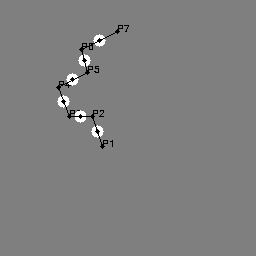

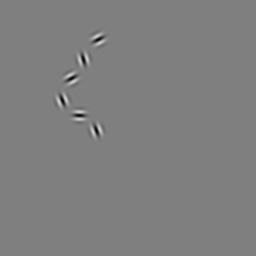

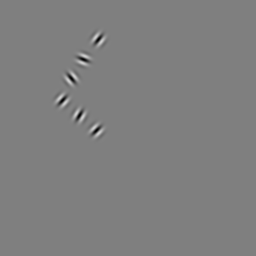

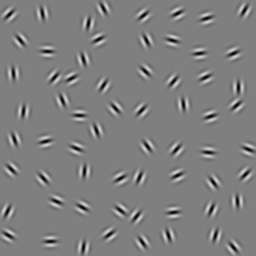

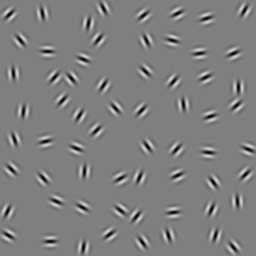

In [43]:
img_contour,img_control,img_contour_background,img_control_background,points,centers,grid,image_recorder_dict= generate_everything(alpha_offset=90,imWidth=256,imHeight=256,gridSize=(8,8),numElements=6,B=75,startRadius=32)

## just to see the path
display(show_path(points, centers, imHeight=256, imWidth=256))

## BLENDED WITH THE path
## image with contour
# display(blend(show_path(points, centers, imHeight=256, imWidth=256),img_contour))
# ## control image
# display(blend(show_path(points, centers, imHeight=256, imWidth=256),img_control))


## image with contour
display(img_contour)
## control image
display(img_control)


## image with contour
display(img_contour_background)
## control image
display(img_control_background)


img_contour_background.save('./manuscript_figures/demo_big_small/demo_small_img_contour.png' ,dpi=(300,300))
img_control_background.save('./manuscript_figures/demo_big_small/demo_small_img_control.png' ,dpi=(300,300))
img_contour.save('./manuscript_figures/demo_big_small/demo_small_img_only_contourpath.png' ,dpi=(300,300))
img_control.save('./manuscript_figures/demo_big_small/demo_small_img_only_controlpath.png' ,dpi=(300,300))




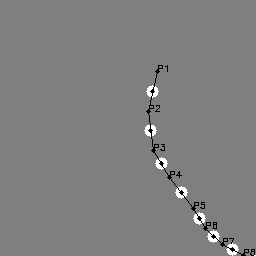

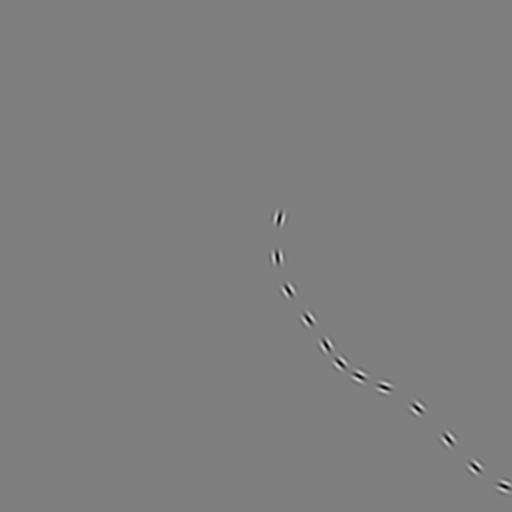

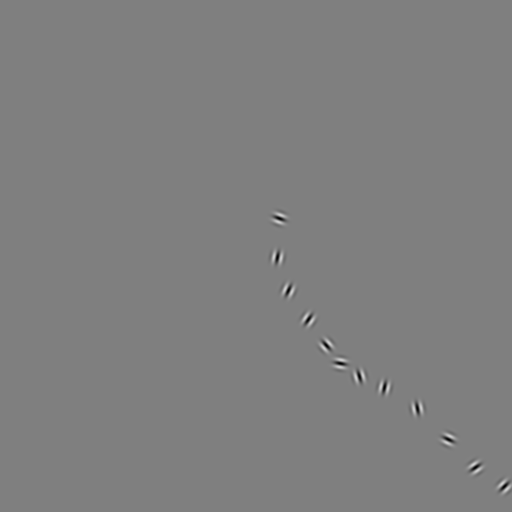

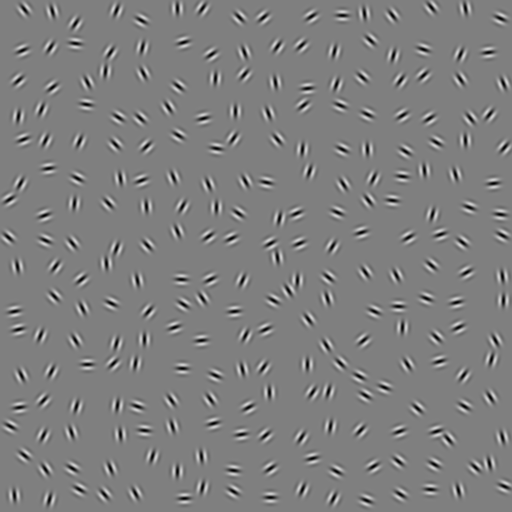

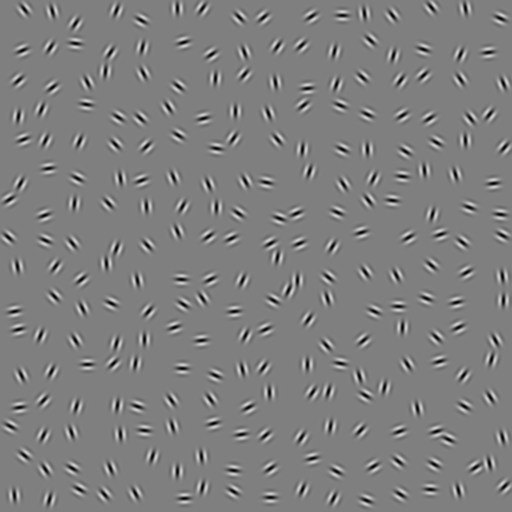

In [44]:
img_contour,img_control,img_contour_background,img_control_background,points,centers,grid,image_recorder_dict= generate_everything(alpha_offset=90,imWidth=512,imHeight=512,gridSize=(16,16),numElements=12,B=15,startRadius=64)

## just to see the path
display(show_path(points, centers, imHeight=256, imWidth=256))

## BLENDED WITH THE path
## image with contour
# display(blend(show_path(points, centers, imHeight=256, imWidth=256),img_contour))
# ## control image
# display(blend(show_path(points, centers, imHeight=256, imWidth=256),img_control))


## image with contour
display(img_contour)
## control image
display(img_control)


## image with contour
display(img_contour_background)
## control image
display(img_control_background)


img_contour_background.save('./manuscript_figures/demo_big_small/demo_big_img_contour.png' ,dpi=(300,300))
img_control_background.save('./manuscript_figures/demo_big_small/demo_big_img_control.png' ,dpi=(300,300))
img_contour.save('./manuscript_figures/demo_big_small/demo_big_img_only_contourpath.png' ,dpi=(300,300))
img_control.save('./manuscript_figures/demo_big_small/demo_big_img_only_controlpath.png' ,dpi=(300,300))




### 8b: Rendering just background

In [45]:
##########################################################################################################################
# RENDERER
def image_renderer_withjustbg(image_recorder_dict):
    ## Extracting what all you need from the image recorder
    
    # Image properties
    gridRows,gridCols = image_recorder_dict['grid'].shape
    imWidth=image_recorder_dict['image_width']
    imHeight=image_recorder_dict['image_height']
    
    # Gabor properties
    gabor_lambda=image_recorder_dict['gabor_lambda']
    gabor_phase=image_recorder_dict['gabor_phase']
    gabor_stdev=image_recorder_dict['gabor_stdev']
    gabor_imSize=image_recorder_dict['gabor_imSize']
    gabor_elCentre=image_recorder_dict['gabor_elCentre']
    gabor_gratingContrast=image_recorder_dict['gabor_gratingContrast']


    ## Initialize the image
    image_contour = np.zeros((imWidth,imHeight))
    image_control = np.zeros((imWidth,imHeight))

    image_contour_background=np.zeros((imWidth,imHeight))
    image_control_background=np.zeros((imWidth,imHeight))
    
    
    image_contour_onlybackground=np.zeros((imWidth,imHeight))
    image_control_onlybackground=np.zeros((imWidth,imHeight))



    c = 0
    for row in range(gridRows):
        for col in range(gridCols):
            if image_recorder_dict['grid'][row,col]:

                alpha_contour = image_recorder_dict['element_theta_contour'][row][col]
                alpha_control = image_recorder_dict['element_theta_control'][row][col]
                startX = image_recorder_dict['element_position'][row][col][0]
                startY = image_recorder_dict['element_position'][row][col][1]


                element_contour,_,_ = Gabor2D(lambda_=gabor_lambda, theta=alpha_contour, phase=gabor_phase, stdev=gabor_stdev, 
                                      imSize=gabor_imSize, elCentre=gabor_elCentre, gratingContrast=gabor_gratingContrast)

                element_control,_,_ = Gabor2D(lambda_=gabor_lambda, theta=alpha_control, phase=gabor_phase, stdev=gabor_stdev, 
                                      imSize=gabor_imSize, elCentre=gabor_elCentre, gratingContrast=gabor_gratingContrast)

                try:
                    image_contour = embed(element_contour.numpy(), image_contour, startX, startY)
                    image_control = embed(element_control.numpy(), image_control, startX, startY)

                    image_contour_background = embed(element_contour.numpy(), image_contour_background, startX, startY)
                    image_control_background = embed(element_control.numpy(), image_control_background, startX, startY)
                except:
                    print("oops", startX, startY)

            else:

                assert image_recorder_dict['element_theta_contour'][row][col] == image_recorder_dict['element_theta_contour'][row][col]
                alpha = image_recorder_dict['element_theta_contour'][row][col]
                startX = image_recorder_dict['element_position'][row][col][0]
                startY = image_recorder_dict['element_position'][row][col][1]

                element,_,_ = Gabor2D(lambda_=gabor_lambda, theta=alpha, phase=gabor_phase, stdev=gabor_stdev, 
                                      imSize=gabor_imSize, elCentre=gabor_elCentre, gratingContrast=gabor_gratingContrast)

                try:
                    
                    image_contour_onlybackground = embed(element.numpy(), image_contour_onlybackground, startX, startY)
                    image_control_onlybackground = embed(element.numpy(), image_control_onlybackground, startX, startY)
                    
                    
                    
                    image_contour_background = embed(element.numpy(), image_contour_background, startX, startY)
                    image_control_background = embed(element.numpy(), image_control_background, startX, startY)
                except:
                    print("oops", startX, startY)



    image_contour = np.clip(image_contour, -1,1)
    img_contour = Image.fromarray((image_contour*127.5+127.5).astype(np.uint8))


    image_control = np.clip(image_control, -1,1)
    img_control = Image.fromarray((image_control*127.5+127.5).astype(np.uint8))
    
    
    

    image_contour_background = np.clip(image_contour_background, -1,1)
    img_contour_background = Image.fromarray((image_contour_background*127.5+127.5).astype(np.uint8))

    image_control_background = np.clip(image_control_background, -1,1)
    img_control_background = Image.fromarray((image_control_background*127.5+127.5).astype(np.uint8))
    
    
    
    image_contour_onlybackground = np.clip(image_contour_onlybackground, -1,1)
    image_contour_onlybackground = Image.fromarray((image_contour_onlybackground*127.5+127.5).astype(np.uint8))

    image_control_onlybackground = np.clip(image_control_onlybackground, -1,1)
    image_control_onlybackground = Image.fromarray((image_control_onlybackground*127.5+127.5).astype(np.uint8))
    
    
    
    
    
    return img_contour, img_control, img_contour_background, img_control_background, image_contour_onlybackground, image_control_onlybackground
##########################################################################################################################

In [46]:
### Generate image

img_contour,img_control,img_contour_background,img_control_background,points,centers,grid,image_recorder_dict= generate_everything(alpha_offset=90-0,B=30)

### Rendering the above with just the background
img_contour, img_control, img_contour_background, img_control_background, image_contour_onlybackground, image_control_onlybackground=image_renderer_withjustbg(image_recorder_dict)

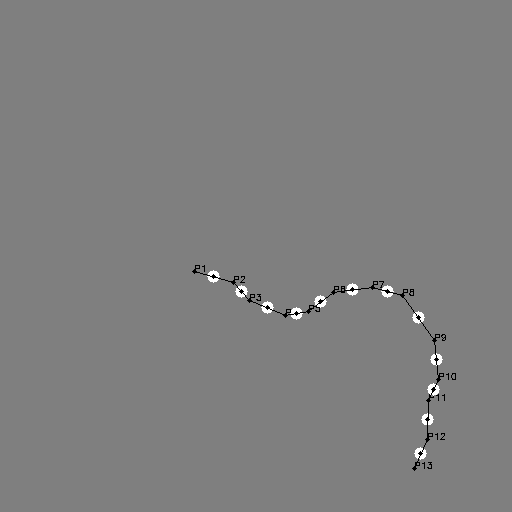

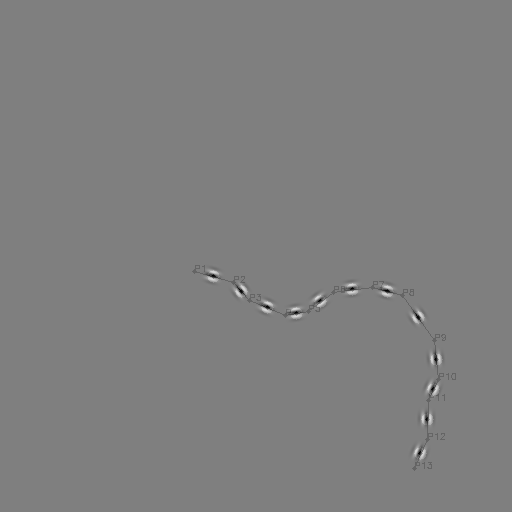

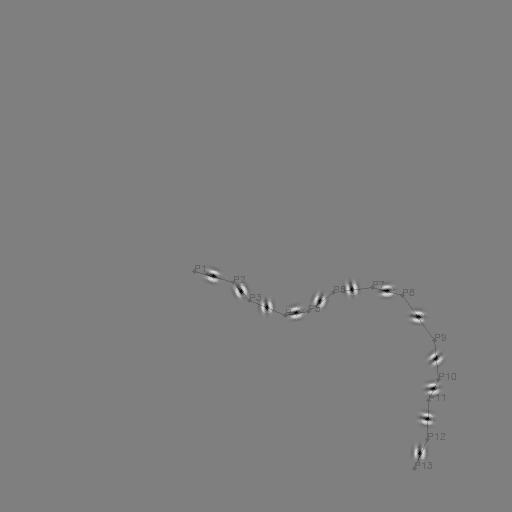

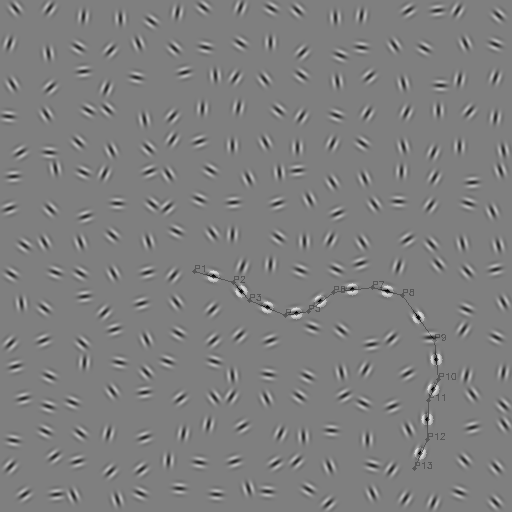

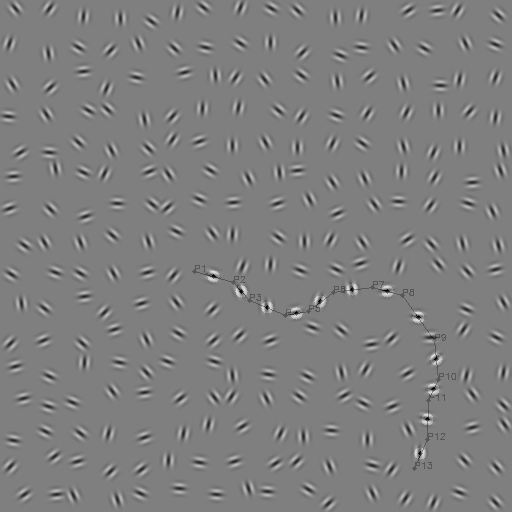

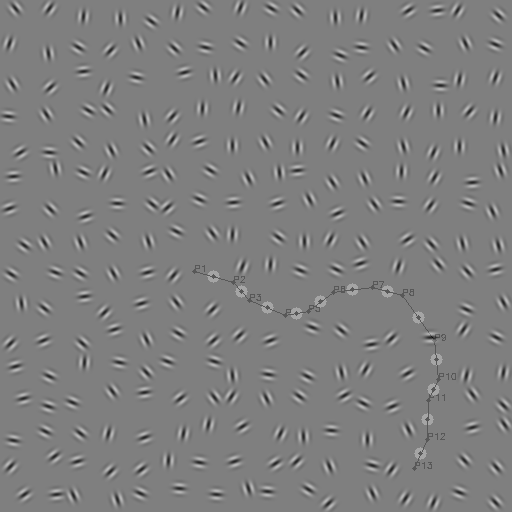

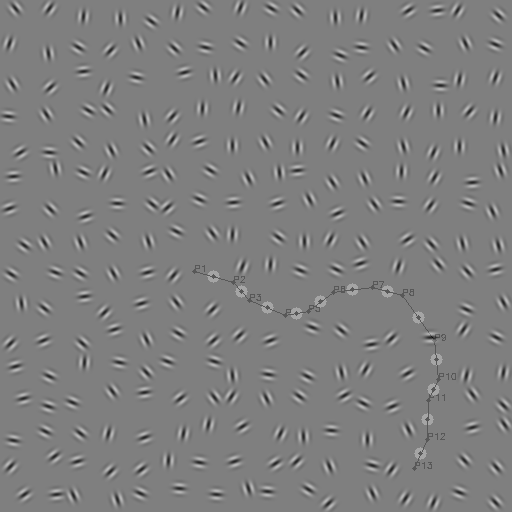

In [47]:
display(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']))


display(blend(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']),img_contour,0.8))
display(blend(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']),img_control,0.8))



display(blend(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']),img_contour_background,0.7))
display(blend(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']),img_control_background,0.7))



display(blend(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']),image_contour_onlybackground,0.7))
display(blend(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']),image_control_onlybackground,0.7))


